<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/T_DenseNet121(3)_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
test_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Test"
train_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Train"
val_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Val"

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras.callbacks import History 
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [4]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [5]:
nb_train_samples = len(train.filenames)  
nb_train_samples
num_classes=len(train.class_indices)
num_classes

3

In [10]:
from keras.utils.np_utils import to_categorical 
 # get the class lebels for the training data, in the original order  
train_labels = train.classes  
   
 # convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 
train_labels 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [11]:
validation_labels = validation.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 
validation_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [13]:
test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [14]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D,Flatten
from keras.models import Model
from keras import backend as K

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

# model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

29089792/29084464 [==============================] - 0s 0us/step


In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [18]:
r = model.fit(
    train,
    validation_data = validation, 
    steps_per_epoch = 262,
    validation_steps=25 ,
    epochs = 10
)

Epoch 1/10
262/262 [==============================] - 2018s 8s/step - loss: 0.3395 - accuracy: 0.8721 - val_loss: 0.6169 - val_accuracy: 0.8400
Epoch 2/10
262/262 [==============================] - 173s 659ms/step - loss: 0.1266 - accuracy: 0.9554 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3/10
262/262 [==============================] - 175s 669ms/step - loss: 0.0984 - accuracy: 0.9643 - val_loss: 9.9705e-05 - val_accuracy: 1.0000
Epoch 4/10
262/262 [==============================] - 175s 667ms/step - loss: 0.0894 - accuracy: 0.9673 - val_loss: 3.3937e-04 - val_accuracy: 1.0000
Epoch 5/10
262/262 [==============================] - 175s 667ms/step - loss: 0.0790 - accuracy: 0.9707 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 6/10
262/262 [==============================] - 175s 667ms/step - loss: 0.0704 - accuracy: 0.9751 - val_loss: 0.2406 - val_accuracy: 0.8800
Epoch 7/10
262/262 [==============================] - 175s 666ms/step - loss: 0.0523 - accuracy: 0.9829 - val_loss: 0.

In [20]:

evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 641s 230ms/step - loss: 0.3278 - accuracy: 0.9104
Test Accuracy: 91.04%
262/262 [==============================] - 140s 533ms/step - loss: 0.2065 - accuracy: 0.9314
Train Accuracy: 93.14%


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np


# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.785775,0.997059,0.993541,0.906452,0.925458,0.925458
recall,0.997849,0.729032,0.992473,0.906452,0.906452,0.906452
f1-score,0.879204,0.842236,0.993007,0.906452,0.904816,0.904816
support,930.000000,930.000000,930.000000,0.906452,2790.000000,2790.000000


In [23]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[928   2   0]
 [246 678   6]
 [  7   0 923]]


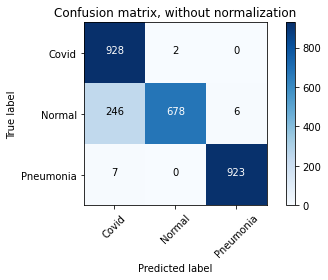

In [24]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Covid', 'Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Text(0.5, 1.0, 'Accuracy Evolution')

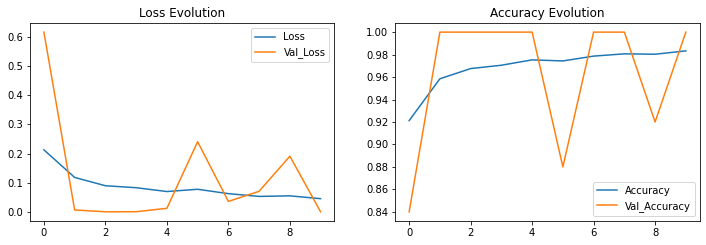

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')